In [32]:
import tensorflow as tf
import numpy as np

def target_function(x):
    return tf.cos(2 * x)

# Definimos una capa personalizada para el polinomio de grado 3
class PolynomialLayer(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(PolynomialLayer, self).__init__(**kwargs)

    def build(self, input_shape):
        # Agregar los parámetros entrenables
        self.a0 = self.add_weight(name='a0', shape=(1,), initializer='zeros', trainable=True)
        self.a1 = self.add_weight(name='a1', shape=(1,), initializer='zeros', trainable=True)
        self.a2 = self.add_weight(name='a2', shape=(1,), initializer='zeros', trainable=True)
        self.a3 = self.add_weight(name='a3', shape=(1,), initializer='zeros', trainable=True)
        super(PolynomialLayer, self).build(input_shape)

    def call(self, x):
        # Calcular el valor del polinomio
        result = self.a0 + self.a1 * x + self.a2 * x**2 + self.a3 * x**3
        return result

# Capas
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(1,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    PolynomialLayer(),
])
model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 100)               200       
                                                                 
 dense_44 (Dense)            (None, 64)                6464      
                                                                 
 dense_45 (Dense)            (None, 32)                2080      
                                                                 
 dense_46 (Dense)            (None, 20)                660       
                                                                 
 polynomial_layer_13 (Polyn  (None, 20)                4         
 omialLayer)                                                     
                                                                 
Total params: 9408 (36.75 KB)
Trainable params: 9408 (36.75 KB)
Non-trainable params: 0 (0.00 Byte)
___________________

In [35]:
# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Generar datos de entrenamiento en el intervalo [-1, 1]
x_train = np.linspace(-1, 1, 100)
y_train = target_function(x_train)

# Entrenar el modelo
model.fit(x_train, y_train, epochs=1000, verbose=0)

# Evaluar el modelo
x_test = np.linspace(-1, 1, 1000)
y_pred = model.predict(x_test)

32/32 [==============================] - 0s 3ms/step


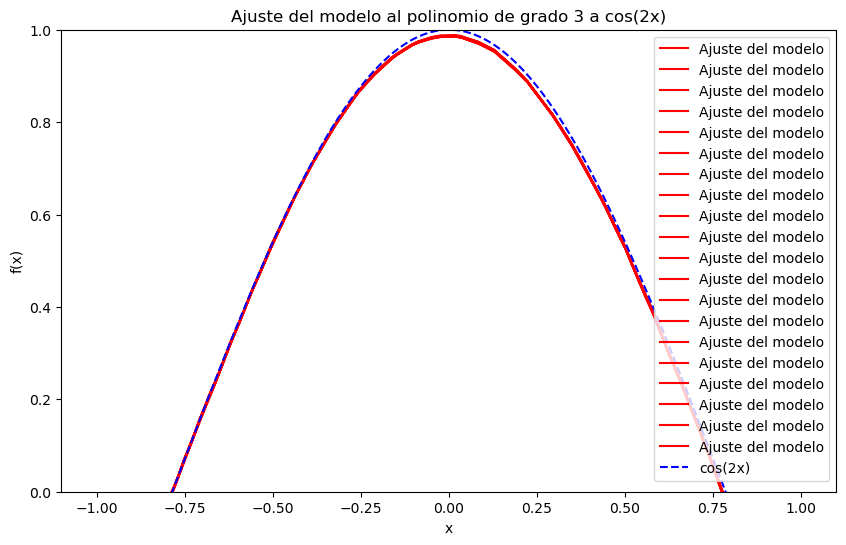

In [36]:
# Graficar los resultados
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
#plt.scatter(x_train, y_train, label='Datos de entrenamiento', color='b')
plt.plot(x_test, y_pred, label='Ajuste del modelo', color='r')
plt.plot(x_test, np.cos(2 * x_test), label='cos(2x)', linestyle='--', color='b')
plt.ylim(0, 1)  # Establecer los límites del eje Y
plt.legend()
plt.title('Ajuste del modelo al polinomio de grado 3 a cos(2x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()